<h2>Simple Linear Regression </h2>
<p>Step by step Simple Linear Regression dengan modifikasi dari Lab SLR cognitiveclass.ai</p>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

<p>Download dataset yang akan digunakan, saat ini kita akan menggunakan dataset FuelConsumption.csv yang berisi peringkat konsumsi bahan bakar model khusus dan perkiraan emisi karbon dioksida untuk kendaraan new light-duty untuk penjualan eceran di Kanada. Resource : https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64</p>

In [2]:
fuel =  'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'

In [3]:
df = pd.read_csv(fuel)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


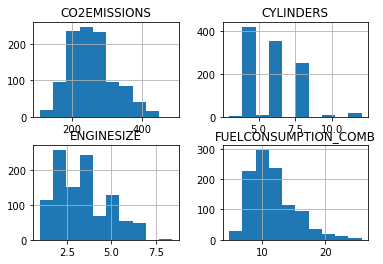

In [6]:
#plot data feature
cdf.hist()
plt.show()

<h3>Plot masing-masing Data Feature dan Data Target untuk melihat hubungan Linear dari keduanya</h3>

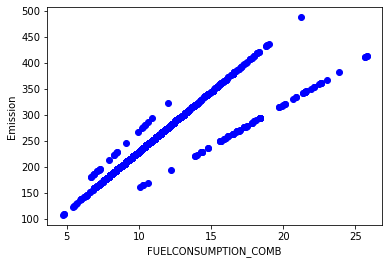

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

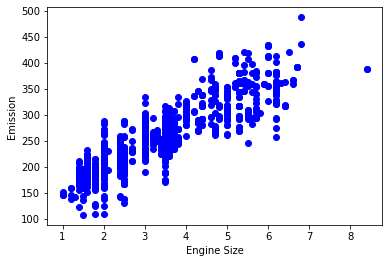

In [8]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,  color='blue' )
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

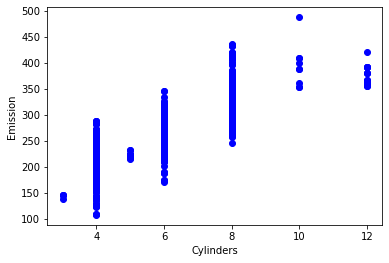

In [9]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,  color='blue' )
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

<h3>Split Data Train dan Data Tes</h3>

In [10]:
x = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y = df[['CO2EMISSIONS']] 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

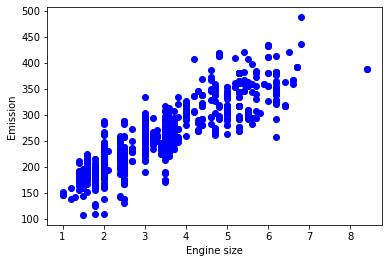

In [11]:
#plot data train
plt.scatter(x_train.ENGINESIZE, y_train,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<h3>Modeling</h3>
<p> Melakukan modeling terhadap dataset. Karena Simple Linear Regression menggunakan 1 data feature(x) maka kita mengambil salah satu data feature yang kita miliki (saat ini kita gunakan data ENGINESIZE). Lalu dilakukan fitting data terhadap model</p>
<p>Rumus Simple Linear Regression : <b> y = a + bx </b></p>
<p> keterangan : </p>
<p> y = variabel terikat (data target)<br>
    x = variabel bebas (data feature / predictor<br>
    a = perpotongan (intercept)<br>
    b = kemiringan (coef)
    </p>

In [12]:
from sklearn import linear_model
model = linear_model.LinearRegression()
x_train_engine = x_train[['ENGINESIZE']]
model.fit(x_train_engine, y_train)
# The coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [[39.4153746]]
Intercept:  [124.77059523]


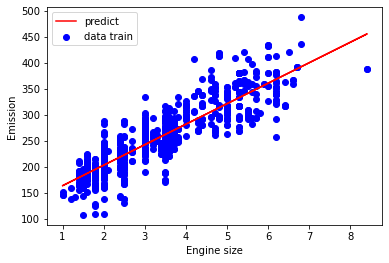

In [13]:
plt.scatter(x_train_engine, y_train,  color='blue', label='data train')
plt.plot(x_train_engine, model.coef_[0][0]*x_train_engine + model.intercept_[0], '-r', label='predict')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.legend()

<h3>Evaluasi</h3>
<p>Perlu diadakan evaluasi terhadap model yang digunakan. Apakah model ini tepat untuk melakukan prediksi terhadap data yang ktia miliki. <br>
Mean Absolute Error : rata-rata nilai error <br>
Mean Squared Error : rata-rata dari error kuadrat. Lebih populer digunakan daripada Mean Absolute Error<br>
R2-score : untuk melihat keakuratan hasil prediksi dengan nilai yang sebenarnya. Semakin tinggi nilai R2-score, maka model yang digunakan semakin baik
</p>


In [14]:
from sklearn.metrics import r2_score

x_test_engine =x_test[['ENGINESIZE']]
y_pred = model.predict(x_test_engine)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred ,y_test) )

Mean absolute error: 23.21
Residual sum of squares (MSE): 955.37
R2-score: 0.71
